# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

In [2]:
%%time
data = get_date_list(data)
data = run_engine(data)

 27%|████████▏                     | 524671/1911315 [00:31<01:26, 15964.92it/s]

pls    0.0115
dtype: float64
--------------------------------------
                  date ord_types               close_type      pls
29 2021-01-07 08:23:26     short  simple_slema_move_close  0.00086
30 2021-01-07 10:05:36     short  simple_slema_move_close  0.00043
31 2021-01-07 12:51:37     short                all_close -0.00163
32 2021-01-07 12:51:37     short                all_close  0.00170
33 2021-01-07 16:20:40     short                all_close -0.00197
34 2021-01-07 16:20:40     short                all_close -0.00060
35 2021-01-07 16:20:40     short                all_close  0.00270
36 2021-01-08 02:28:56      long                all_close -0.00232
37 2021-01-08 02:28:56      long                all_close -0.00155
38 2021-01-08 02:28:56      long                all_close  0.00060
39 2021-01-08 02:28:56      long                all_close  0.00360
40 2021-01-08 10:00:25     short                all_close -0.00166
41 2021-01-08 10:00:25     short                all_close  0.

100%|█████████████████████████████| 1911315/1911315 [02:33<00:00, 12433.32it/s]

Wall time: 3min 14s


In [3]:
data['temp_df']['open_order'] = data['open_order_temp_list']
data['temp_df']['pl'] = data['pl_temp_list'] 
data['temp_df'].to_csv('data/temp.csv')

In [4]:
min(data['temp_df']['pl'])

-0.57036

In [5]:
max(data['temp_df']['pl'])

0.00258

In [6]:
max(data['temp_df']['open_order'])

4

In [7]:
data['dt_val']

datetime.datetime(2021, 1, 31, 23, 59, 53)

In [8]:
data['orders_list']

{'total_pl': -0.35584,
 'pl_list': [-0.01379, -0.05915, -0.1146, -0.1683],
 1: {'open_order_type': 'long', 'ask': 1.22606, 'pl': -0.01379},
 2: {'open_order_type': 'long', 'ask': 1.2241, 'pl': -0.05915},
 3: {'open_order_type': 'long', 'ask': 1.22373, 'pl': -0.1146},
 4: {'open_order_type': 'long', 'ask': 1.22349, 'pl': -0.1683}}

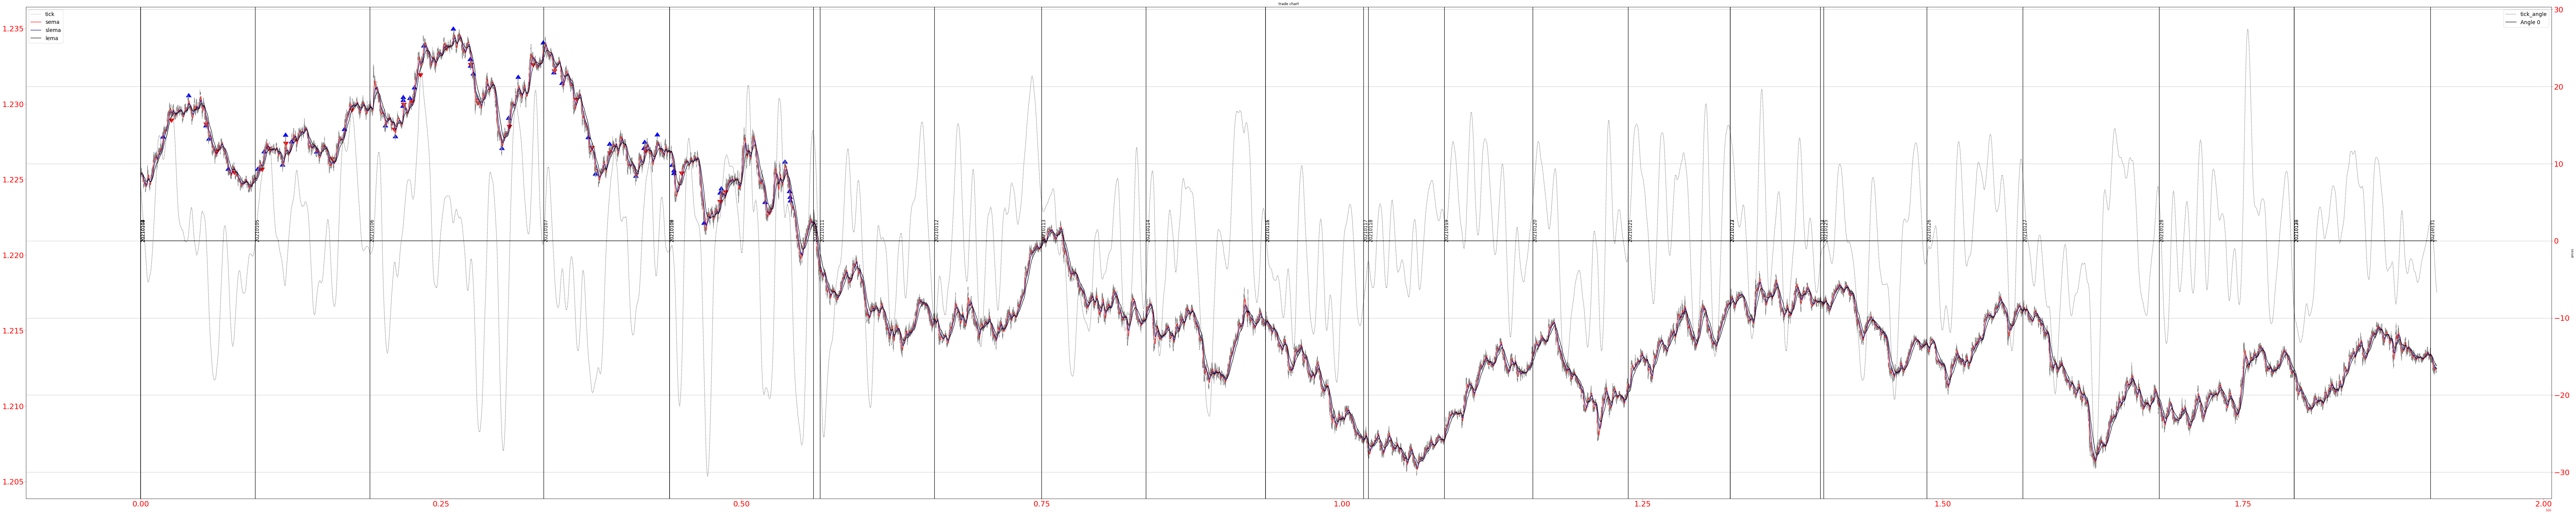

-----------------------------------------------------
Total PL : 0.011499999999999998
-------------
net_pl            : 0.0115/0.05778
-------------
+ve               : num= 30    sum= +0.03464    avg= +0.00115
-ve               : num= 14    sum= -0.02314    avg= -0.00165
-----------------------------------------------------
month_val
1    0.0115
Name: pls, dtype: float64
-----------------------------------------------------
all_close                  26
simple_slema_move_close    18
Name: close_type, dtype: int64
-----------------------------------------------------


In [9]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

In [10]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
4    0.00196
5    0.00277
6    0.00438
7    0.00149
8    0.00090
Name: pls, dtype: float64

In [11]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete : {data["df_name"]}')

In [12]:
data['report_df'].groupby(['close_type'])['pls'].mean()

close_type
all_close                  0.000047
simple_slema_move_close    0.000572
Name: pls, dtype: float64

In [13]:
data['report_df'].groupby(['close_type'])['pls'].sum()

close_type
all_close                  0.00121
simple_slema_move_close    0.01029
Name: pls, dtype: float64

In [14]:
data['report_df'].groupby(['close_type'])['pls'].count()

close_type
all_close                  26
simple_slema_move_close    18
Name: pls, dtype: int64

In [15]:
x = np.round(data['report_df'].groupby(['month_val', 'date_val'])['pls'].sum().values.mean(),4)
print(f'Average pips per day : {x}')

Average pips per day : 0.0023


In [16]:
x = data['report_df'].groupby(['month_val', 'date_val'])['pls'].count().values.mean()
print(f'Average orders per day : {x}')

Average orders per day : 8.8


In [17]:
data['report_df'].groupby(['date'])['date'].count().value_counts().sort_values(ascending=False)

1    18
2     6
3     2
4     2
Name: date, dtype: int64

In [18]:
data['report_df']['duration'].sort_values(ascending=False)

36   0 days 07:44:42
27   0 days 03:05:09
29   0 days 02:42:45
19   0 days 02:39:44
31   0 days 02:23:21
20   0 days 02:18:38
1    0 days 01:55:30
40   0 days 01:53:34
37   0 days 01:49:44
10   0 days 01:36:57
26   0 days 01:36:51
13   0 days 01:25:27
38   0 days 01:22:02
39   0 days 01:21:47
0    0 days 01:19:20
12   0 days 01:11:51
6    0 days 01:07:57
5    0 days 01:06:05
42   0 days 00:59:27
33   0 days 00:59:01
11   0 days 00:52:19
24   0 days 00:48:38
3    0 days 00:46:31
9    0 days 00:45:46
17   0 days 00:44:10
4    0 days 00:43:11
18   0 days 00:36:27
7    0 days 00:24:31
30   0 days 00:22:10
23   0 days 00:19:45
43   0 days 00:15:27
34   0 days 00:13:45
35   0 days 00:09:28
28   0 days 00:08:08
25   0 days 00:08:06
32   0 days 00:05:12
14   0 days 00:02:34
21   0 days 00:02:17
15   0 days 00:02:08
8    0 days 00:02:05
16   0 days 00:02:01
22   0 days 00:01:18
41   0 days 00:01:04
2    0 days 00:00:42
Name: duration, dtype: timedelta64[ns]